# Build an agent with tool-calling superpowers 🦸 using smolagents
_Authored by: [Aymeric Roucher](https://huggingface.co/m-ric)_

This notebook demonstrates how you can use [**smolagents**](https://huggingface.co/docs/smolagents/index) to build awesome **agents**!

What are **agents**? Agents are systems that are powered by an LLM and enable the LLM (with careful prompting and output parsing) to use specific *tools* to solve problems.

These *tools* are basically functions that the LLM couldn't perform well by itself: for instance for a text-generation LLM like [Llama-3-70B](https://huggingface.co/meta-llama/Meta-Llama-3-70B-Instruct), this could be an image generation tool, a web search tool, a calculator...

What is **smolagents**? It's an library that provides building blocks to build your own agents! Learn more about it in the [documentation](https://huggingface.co/docs/smolagents/index).

Let's see how to use it, and which use cases it can solve.

Run the line below to install required dependencies:

In [1]:
!pip install smolagents datasets langchain sentence-transformers faiss-cpu duckduckgo-search openai langchain-community --upgrade -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.3/472.3 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

Let's login in order to call the HF Inference API:

In [2]:
from huggingface_hub import notebook_login

notebook_login()

## 1. 🏞️ Multimodal + 🌐 Web-browsing assistant

For this use case, we want to show an agent that browses the web and is able to generate images.

To build it, we simply need to have two tools ready: image generation and web search.
- For image generation, we load a tool from the Hub that uses the HF Inference API (Serverless) to generate images using Stable Diffusion.
- For the web search, we use a built-in tool.

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tool.py:   0%|          | 0.00/635 [00:00<?, ?B/s]

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Generate me a photo of the car that James bond drove in the latest movie.                                       │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-72B-Instruct ────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  query = "latest James Bond movie"                                                                                
  latest_movie = web_search(query=query)                                                                           
  print(f"The latest James Bond movie is {latest_movie}.")                                                         
                                                                                                                   
  query = "car driven by James Bond in " + latest_movie                                                            
  bond_car = web_search(query=query)                                                                               
  print(f"The car driven by James Bond in {latest_movie} is {bond_car}.")                                          
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
The latest James Bond movie is ## Search Results

[Who is the new James Bond? Everything we know about the next 007 
film](https://www.telegraph.co.uk/films/0/next-james-bond-film-who-will-play-007-and-who-will-direct-amazon/)
The next Bond could be Scottish. There could be good news for fans who still think of Sean Connery as the one true 
James Bond: Scottish actor Stuart Martin is the latest name to emerge as a 007 ...

[Big shakeup for 'next phase' of James Bond franchise 
announced](https://abcnews.go.com/GMA/Culture/big-shakeup-next-phase-james-bond-franchise-announced/story?id=119007
064)
Broccoli said her life has "been dedicated to maintaining and building upon the extraordinary legacy" of James Bond
and, with Wilson's retirement and the conclusion of the latest run of 007 films ...

[James Bond 26 Casting Update Reveals Conditions For New 007: "It's A 
...](https://screenrant.com/james-bond-26-casting-conditions-updated-barbara-broccoli/)
James Bond 26 gets an intriguing new update from franchise producer Barbara Broccoli, who reveals the conditions 
for the next actor. After first playing the character in 2006's Casino Royale, Daniel Craig bid farewell to the hit
spy franchise with No Time To Die in 2021. There's been no actor officially cast as his replacement since, but the 
Internet and social media are awash with rumors and ...

[Who is the new James Bond? Everything we know about the next 007 
film](https://www.yahoo.com/entertainment/james-bond-everything-know-next-120353799.html)
James Bond will return. Those words appeared - as is traditional - at the end of No Time to Die, Daniel Craig's 
final Bond outing. Even with Craig's 007 blown to smithereens, a new actor ...

[List of James Bond films - Wikipedia](https://en.wikipedia.org/wiki/List_of_James_Bond_films)
James Bond is a fictional character created by British novelist Ian Fleming in 1953. A British secret agent working
for MI6 under the codename 007, Bond has been portrayed on film in twenty-seven productions by actors Sean Connery,
David Niven, George Lazenby, Roger Moore, Timothy Dalton, Pierce Brosnan, and Daniel Craig. Eon Productions, held 
the adaptation rights to all of Fleming's Bond ...

[No Time to Die - Wikipedia](https://en.wikipedia.org/wiki/No_Time_to_Die)
No Time to Die is a 2021 spy film and the twenty-fifth in the James Bond series, the final to be produced by Eon 
Productions, and the final to star Daniel Craig as fictional British MI6 agent James Bond.The plot follows Bond, 
who has left active service with MI6, and is recruited by the CIA to find a kidnapped scientist, which leads to a 
showdown with a powerful and vengeful adversary armed ...

[Who is the new James Bond? Who will be the next 007 after ... - Time 
Out](https://www.timeout.com/news/everything-we-know-about-bond-26-so-far-010523)
4. James Norton. Age: 38 Current odds: 4/1. If he gets the role, the magnificently-haired 
Yorkshireman-turned-Londoner would represent the most luxuriantly-maned Bond since Brosnan. And the rumour ...

[Bond 26: Everything We Know About Next 007 Film - 
Newsweek](https://www.newsweek.com/james-bond-26-everything-we-know-next-007-film-1891233)
The James Bond films have been popular for decades and since Daniel Craig stepped away from the titular role in 
2021, people have been speculating what the future of the franchise will look like.

[Aaron Taylor-Johnson 'Is' The New James Bond. Here's Everything ... - 
MSN](https://www.msn.com/en-us/movies/news/aaron-taylor-johnson-is-the-new-james-bond-heres-everything-we-know-so-f
ar/ar-BB1k9gJR)
After years of speculation, a new James Bond has reportedly been chosen. Ever since Danel Craig retired from his 
career-defining role after 2021's No Time To Die, rumours have swirled about who ...

[No Time to Die (2021) - IMDb](https://www.imdb.com/title/tt2382320/)
No Time to Die: Directed by Cary Joji Fukunaga. With Daniel Craig, Léa Seydoux, Rami Malek, Lashana Lynch. James 
Bond has lef

Code execution failed at line 'bond_car = web_search(query=query)' due to: DuckDuckGoSearchException: 
https://lite.duckduckgo.com/lite/ return None. params=None content=None data={'q': 'car driven by James Bond in ## 
Search Results\n\n[Who is the new James Bond? Everything we know about the next 007 
film](https://www.telegraph.co.uk/films/0/next-james-bond-film-who-will-play-007-and-who-will-direct-amazon/)\nThe 
next Bond could be Scottish. There could be good news for fans who still think of Sean Connery as the one true 
James Bond: Scottish actor Stuart Martin is the latest name to emerge as a 007 ...\n\n[Big shakeup for \'next 
phase\' of James Bond franchise 
announced](https://abcnews.go.com/GMA/Culture/big-shakeup-next-phase-james-bond-franchise-announced/story?id=119007
064)\nBroccoli said her life has "been dedicated to maintaining and building upon the extraordinary legacy" of 
James Bond and, with Wilson\'s retirement and the conclusion of the latest run of 007 films ...\n\n[James Bond 26 
Casting Update Reveals Conditions For New 007: "It\'s A 
...](https://screenrant.com/james-bond-26-casting-conditions-updated-barbara-broccoli/)\nJames Bond 26 gets an 
intriguing new update from franchise producer Barbara Broccoli, who reveals the conditions for the next actor. 
After first playing the character in 2006\'s Casino Royale, Daniel Craig bid farewell to the hit spy franchise with
No Time To Die in 2021. There\'s been no actor officially cast as his replacement since, but the Internet and 
social media are awash with rumors and ...\n\n[Who is the new James Bond? Everything we know about the next 007 
film](https://www.yahoo.com/entertainment/james-bond-everything-know-next-120353799.html)\nJames Bond will return. 
Those words appeared - as is traditional - at the end of No Time to Die, Daniel Craig\'s final Bond outing. Even 
with Craig\'s 007 blown to smithereens, a new actor ...\n\n[List of James Bond films - 
Wikipedia](https://en.wikipedia.org/wiki/List_of_James_Bond_films)\nJames Bond is a fictional character created by 
British novelist Ian Fleming in 1953. A British secret agent working for MI6 under the codename 007, Bond has been 
portrayed on film in twenty-seven productions by actors Sean Connery, David Niven, George Lazenby, Roger Moore, 
Timothy Dalton, Pierce Brosnan, and Daniel Craig. Eon Productions, held the adaptation rights to all of Fleming\'s 
Bond ...\n\n[No Time to Die - Wikipedia](https://en.wikipedia.org/wiki/No_Time_to_Die)\nNo Time to Die is a 2021 
spy film and the twenty-fifth in the James Bond series, the final to be produced by Eon Productions, and the final 
to star Daniel Craig as fictional British MI6 agent James Bond.The plot follows Bond, who has left active service 
with MI6, and is recruited by the CIA to find a kidnapped scientist, which leads to a showdown with a powerful and 
vengeful adversary armed ...\n\n[Who is the new James Bond? Who will be the next 007 after ... - Time 
Out](https://www.timeout.com/news/everything-we-know-about-bond-26-so-far-010523)\n4. James Norton. Age: 38 Current
odds: 4/1. If he gets the role, the magnificently-haired Yorkshireman-turned-Londoner would represent the most 
luxuriantly-maned Bond since Brosnan. And the rumour ...\n\n[Bond 26: Everything We Know About Next 007 Film - 
Newsweek](https://www.newsweek.com/james-bond-26-everything-we-know-next-007-film-1891233)\nThe James Bond films 
have been popular for decades and since Daniel Craig stepped away from the titular role in 2021, people have been 
speculating what the future of the franchise will look like.\n\n[Aaron Taylor-Johnson \'Is\' The New James Bond. 
Here\'s Everything ... - 
MSN](https://www.msn.com/en-us/movies/news/aaron-taylor-johnson-is-the-new-james-bond-heres-everything-we-know-so-f
ar/ar-BB1k9gJR)\nAfter years of speculation, a new James Bond has reportedly been chosen. Ever since Danel Craig 
retired from his career-defining role after 2021\'s No Time To Die, rumours ha

[Step 0: Duration 8.98 seconds| Input tokens: 2,165 | Output tokens: 136]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  query = "car driven by Daniel Craig in No Time To Die"                                                           
  bond_car = web_search(query=query)                                                                               
  print(f"The car driven by James Bond in No Time To Die is {bond_car}.")                                          
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
The car driven by James Bond in No Time To Die is ## Search Results

[Every Car James Bond Drives in 'No Time To Die' - 
MotorBiscuit.com](https://www.motorbiscuit.com/every-car-james-bond-drives-no-time-to-die/)
The BMW-powered DB5 stunt car may be the most unique custom car in a film since the new batmobile. Here are all 
007's vehicles in No Time To Die. 1964 Aston Martin DB5 Daniel Craig Shows Prince Charles Bond's DB5 | Niklas 
Halle'n - WPA Pool/Getty Images. The Aston Martin DB5 is the quintessential Bond car. This 1964 classic has 
appeared ...

[James Bond: Every Car Appearing In No Time To Die - Screen 
Rant](https://screenrant.com/james-bond-no-time-die-movie-cars/)
The No Time To Die trailer includes a brief glimpse of Bond whipping a sheet off what appears to be the Aston 
Martin V8 Vantage, as driven by Timothy Dalton in The Living Daylights.The Aston Martin website actually only lists
the V8 Saloon, similar to the Dalton-era model in many aspects. Nevertheless, the number plates are the same, 
implying that the Craig's V8 is intended to be the car from ...

[All of the Bond cars of 'No Time To Die' (caution for 
spoilers)](https://www.autoblog.com/features/no-time-to-die-james-bond-cars)
No Time To Die picks up right around where Spectre leaves us. James Bond (Daniel Craig) and Madeleine Swann (Léa 
Seydoux) are driving along in Bond's restored and iconic DB 5 in Matera, Italy.

[James Bond's cars: the Daniel Craig era - The James Bond 
Dossier](https://www.thejamesbonddossier.com/lifestyle/cars/james-bonds-cars-in-the-daniel-craig-era.htm)
No Time to Die. Daniel Craig's final outing as 007 features no less than four different models of Aston Martin. But
while Bond drives a DB5 and 1987 V8 Vantage the modern DBS Superleggera is driven by Nomi and the much heralded 
Valhalla hardly features at all.

[James Bond behind the Wheel in 'No Time to Die': All the 
Details](https://www.caranddriver.com/features/a37806505/james-bond-driving-aston-martin-db5-no-time-to-die/)
But in No Time to Die—finally released after long pandemic-related delays—007 honors his silver-screen roots with a
chase in a 1963 DB5. More Bond Tales from Aston-Driving James Bond Stuntman

[James Bond's Special Effects Coordinator Tells All About 'No Time To 
...](https://www.newsweek.com/james-bonds-special-effects-coordinator-tells-all-about-no-time-die-car-chase-scenes-
1637288)
Daniel Craig, as James Bond, drives a Land Rover in "No Time to Die". Eon Productions Despite having a robust 
lineup of old and new vehicles in the film, Corbould doesn't initially approach the ...

['Bond 25': These 4 Aston Martin Cars Are Featured in 'No Time to Die 
...](https://www.mensjournal.com/gear/bond-25-these-4-aston-martin-cars-are-featured-in-no-time-to-die)
Daniel Craig will be driving some incredible cars in the next James Bond film No Time To Die.Over the years, Aston 
Martin has been the most connected brand to the Bond universe when it comes to ...

[Here's Every Car James Bond Drives In No Time To Die (Plus 2 ... - 
HotCars](https://www.hotcars.com/heres-every-car-james-bond-drives-in-no-time-to-die-plus-2-he-dodges/)
No Time To Die will be Daniel Craig's last outing as James Bond. Unfortunately, the film's release has been delayed
again. ... this movie is full of incredible vehicles. Read on to find out every car James bond drives, and two 
villain-driven vehicles he has to dodge. The 25th 007 film is shaping up to be the best Bond movie yet for car fans
...

[No Time To Die: Why Madeleine Had Bond's Car At The End (& What It 
Means)](https://screenrant.com/no-time-die-madeleine-aston-martin-why/)
Warning: SPOILERS for No Time To Die. At the end of No Time To Die, Dr. Madeleine Swann (Léa Seydoux) is driving 
James Bond's (Daniel Craig) Aston Martin V8 Vantage, and here's why she now owns 007's classic car.In a turn of 
events even fans wouldn't have seen coming, Bond sacrificed his life for Madeleine and their young daughter 
Mathild

[Step 1: Duration 6.50 seconds| Input tokens: 6,935 | Output tokens: 220]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  query = "primary car driven by Daniel Craig in No Time To Die"                                                   
  bond_car = web_search(query=query)                                                                               
  print(f"The primary car driven by James Bond in No Time To Die is {bond_car}.")                                  
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
The primary car driven by James Bond in No Time To Die is ## Search Results

[Every Car James Bond Drives in 'No Time To Die' - 
MotorBiscuit.com](https://www.motorbiscuit.com/every-car-james-bond-drives-no-time-to-die/)
The BMW-powered DB5 stunt car may be the most unique custom car in a film since the new batmobile. Here are all 
007's vehicles in No Time To Die. 1964 Aston Martin DB5 Daniel Craig Shows Prince Charles Bond's DB5 | Niklas 
Halle'n - WPA Pool/Getty Images. The Aston Martin DB5 is the quintessential Bond car. This 1964 classic has 
appeared ...

[James Bond: Every Car Appearing In No Time To Die - Screen 
Rant](https://screenrant.com/james-bond-no-time-die-movie-cars/)
The No Time To Die trailer includes a brief glimpse of Bond whipping a sheet off what appears to be the Aston 
Martin V8 Vantage, as driven by Timothy Dalton in The Living Daylights.The Aston Martin website actually only lists
the V8 Saloon, similar to the Dalton-era model in many aspects. Nevertheless, the number plates are the same, 
implying that the Craig's V8 is intended to be the car from ...

[James Bond's cars: the Daniel Craig era - The James Bond 
Dossier](https://www.thejamesbonddossier.com/lifestyle/cars/james-bonds-cars-in-the-daniel-craig-era.htm)
While it is coloured silver birch like the iconic car that originally featured in Goldfinger this car is left hand 
drive. The DB5 has a 4.0 litre engine providing 282 bhp, which could propel the car to a maximum speed of 145 mph. 
... No Time to Die. Daniel Craig's final outing as 007 features no less than four different models of Aston Martin 
...

[All of the Bond cars of 'No Time To Die' (caution for 
spoilers)](https://www.autoblog.com/features/no-time-to-die-james-bond-cars)
No Time To Die picks up right around where Spectre leaves us. James Bond (Daniel Craig) and Madeleine Swann (Léa 
Seydoux) are driving along in Bond's restored and iconic DB 5 in Matera, Italy.

[James Bond behind the Wheel in 'No Time to Die': All the 
Details](https://www.caranddriver.com/features/a37806505/james-bond-driving-aston-martin-db5-no-time-to-die/)
The rally champ's driving skills are on full display in the DB5's big scene. In No Time to Die, the Aston has been 
substantially upgraded from the original Goldfinger car. Instead of twin Browning ...

[Here's Every Car James Bond Drives In No Time To Die (Plus 2 ... - 
HotCars](https://www.hotcars.com/heres-every-car-james-bond-drives-in-no-time-to-die-plus-2-he-dodges/)
No Time To Die will be Daniel Craig's last outing as James Bond. Unfortunately, the film's release has been delayed
again. ... this movie is full of incredible vehicles. Read on to find out every car James bond drives, and two 
villain-driven vehicles he has to dodge. The 25th 007 film is shaping up to be the best Bond movie yet for car fans
...

[Here are all the cars Bond will drive (and wreck) in No Time To 
Die](https://www.thegentlemansjournal.com/article/here-are-all-the-cars-bond-will-drive-and-wreck-in-no-time-to-die
/)
No Time To Die has hardly sped into cinemas, has it? Instead, thanks to producers and the pandemic, the 25th James 
Bond film has stalled and stopped again and again — piling up in the never-ending traffic jam of postponed 
premieres and delayed release dates. And yet, in April, Daniel Craig's final outing as the superspy should screech 
around the corner and onto our screens.

[No Time To Die: The cars of the new James Bond film - 
Driving.co.uk](https://www.driving.co.uk/news/diversions/no-time-die-cars-james-bond-film/)
NO TIME TO DIE, the 25th film in the James Bond franchise, and the final one starring Daniel Craig as 007, has 
arrived after long delays due to the coronavirus pandemic.. Here we profile the cars from Aston Martin, Land Rover,
Maserati and Toyota that appear in the spotlight. 1. Aston Martin DB5. It's arguably the most famous film car of 
all time, and Bond's silver Aston Martin DB5 is back ...

[Inside James Bond's best cars fr

[Step 2: Duration 7.46 seconds| Input tokens: 13,068 | Output tokens: 333]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 4 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  image_prompt = "1964 Aston Martin DB5, high-res, photorealistic"                                                 
  image = image_generator(prompt=image_prompt)                                                                     
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024 at 0x7E8E15057890>

[Step 3: Duration 21.60 seconds| Input tokens: 20,677 | Output tokens: 432]

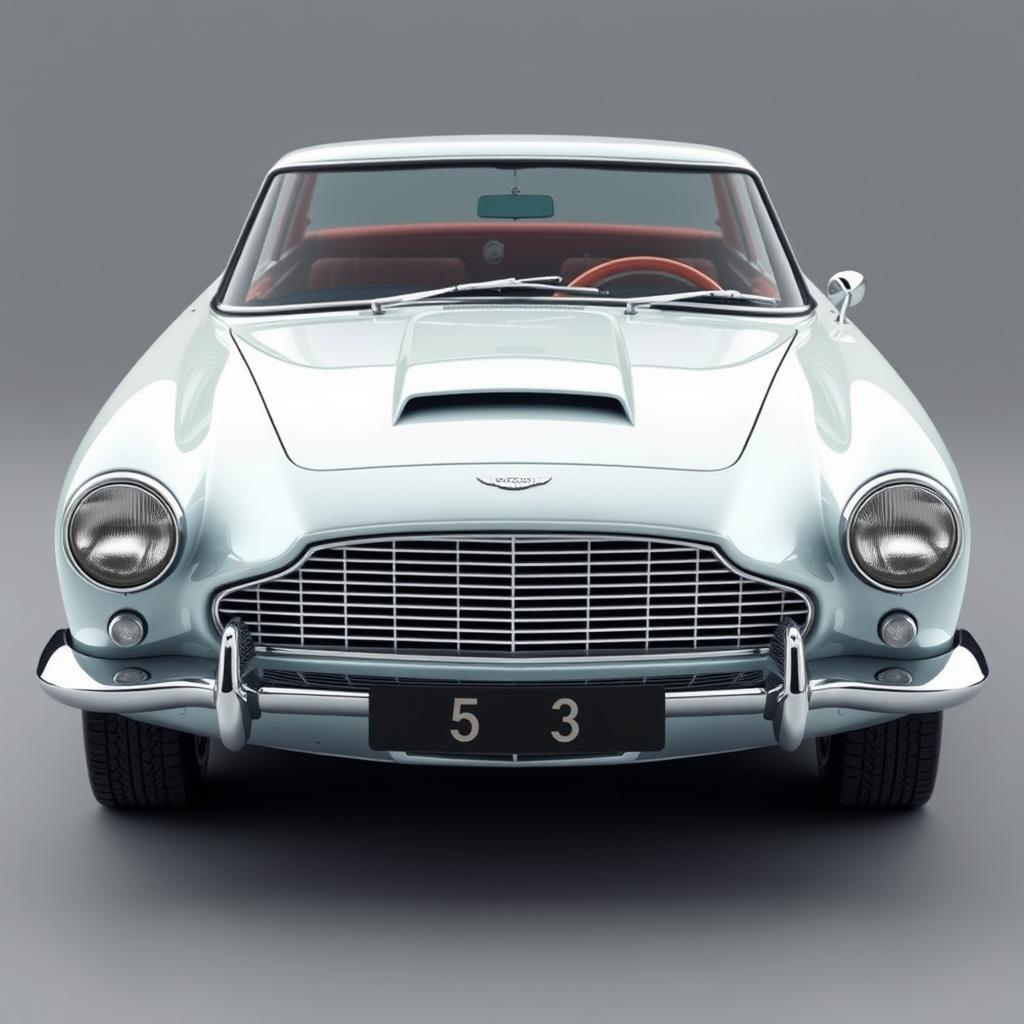

In [3]:
from smolagents import load_tool, CodeAgent, HfApiModel, DuckDuckGoSearchTool

# Import tools from Hub
image_generation_tool = load_tool("m-ric/text-to-image", trust_remote_code=True)

search_tool = DuckDuckGoSearchTool()

model = HfApiModel("Qwen/Qwen2.5-72B-Instruct")
# Initialize the agent with both tools
agent = CodeAgent(
    tools=[image_generation_tool, search_tool], model=model
)

# Run it!
result = agent.run(
    "Generate me a photo of the car that James bond drove in the latest movie.",
)
result

![Image of an Aston Martin DB5](https://huggingface.co/datasets/huggingface/cookbook-images/resolve/main/agents_db5.png)

## 2. 📚💬 RAG with Iterative query refinement & Source selection

Quick definition: Retrieval-Augmented-Generation (RAG) is ___“using an LLM to answer a user query, but basing the answer on information retrieved from a knowledge base”.___

This method has many advantages over using a vanilla or fine-tuned LLM: to name a few, it allows to ground the answer on true facts and reduce confabulations, it allows to provide the LLM with domain-specific knowledge, and it allows fine-grained control of access to information from the knowledge base.

- Now let’s say we want to perform RAG, but with the additional constraint that some parameters must be dynamically generated. For example, depending on the user query we could want to restrict the search to specific subsets of the knowledge base, or we could want to adjust the number of documents retrieved. The difficulty is: **how to dynamically adjust these parameters based on the user query?**

- A frequent failure case of RAG is when the retrieval based on the user query does not return any relevant supporting documents. **Is there a way to iterate by re-calling the retriever with a modified query in case the previous results were not relevant?**


🔧 Well, we can solve the points above in a simple way: we will **give our agent control over the retriever's parameters!**

➡️ Let's show how to do this. We first load a knowledge base on which we want to perform RAG: this dataset is a compilation of the documentation pages for many `huggingface` packages, stored as markdown.


In [ ]:
import datasets

knowledge_base = datasets.load_dataset("m-ric/huggingface_doc", split="train")

Now we prepare the knowledge base by processing the dataset and storing it into a vector database to be used by the retriever. We are going to use LangChain, since it features excellent utilities for vector databases:


In [ ]:
from langchain.docstore.document import Document
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings

source_docs = [
    Document(page_content=doc["text"], metadata={"source": doc["source"].split("/")[1]})
    for doc in knowledge_base
]

docs_processed = RecursiveCharacterTextSplitter(chunk_size=500).split_documents(
    source_docs
)[:1000]

embedding_model = HuggingFaceEmbeddings(model_name="thenlper/gte-small")
vectordb = FAISS.from_documents(documents=docs_processed, embedding=embedding_model)

/var/folders/6m/9b1tts6d5w960j80wbw9tx3m0000gn/T/ipykernel_16932/1458839689.py:15: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = HuggingFaceEmbeddings(model_name="thenlper/gte-small")


Now that we have the database ready, let’s build a RAG system that answers user queries based on it!

We want our system to select only from the most relevant sources of information, depending on the query.

Our documentation pages come from the following sources:

In [ ]:
all_sources = list(set([doc.metadata["source"] for doc in docs_processed]))
print(all_sources)

['datasets-server', 'datasets', 'optimum', 'gradio', 'blog', 'course', 'hub-docs', 'pytorch-image-models', 'peft', 'evaluate', 'diffusers', 'hf-endpoints-documentation', 'deep-rl-class', 'transformers']


👉 Now let's build a `RetrieverTool` that our agent can leverage to retrieve information from the knowledge base.

Since we need to add a vectordb as an attribute of the tool, we cannot simply use the [simple tool constructor](https://huggingface.co/docs/transformers/main/en/agents#create-a-new-tool) with a `@tool` decorator: so we will follow the advanced setup highlighted in the [advanced agents documentation](https://huggingface.co/docs/transformers/main/en/agents_advanced#directly-define-a-tool-by-subclassing-tool-and-share-it-to-the-hub).

In [ ]:
import json
from smolagents import Tool
from langchain_core.vectorstores import VectorStore


class RetrieverTool(Tool):
    name = "retriever"
    description = "Retrieves some documents from the knowledge base that have the closest embeddings to the input query."
    inputs = {
        "query": {
            "type": "string",
            "description": "The query to perform. This should be semantically close to your target documents. Use the affirmative form rather than a question.",
        },
        "source": {"type": "string", "description": ""},
        "number_of_documents": {
            "type": "string",
            "description": "the number of documents to retrieve. Stay under 10 to avoid drowning in docs",
        },
    }
    output_type = "string"

    def __init__(self, vectordb: VectorStore, all_sources: str, **kwargs):
        super().__init__(**kwargs)
        self.vectordb = vectordb
        self.inputs["source"]["description"] = (
            f"The source of the documents to search, as a str representation of a list. Possible values in the list are: {all_sources}. If this argument is not provided, all sources will be searched.".replace(
                "'", "`"
            )
        )

    def forward(self, query: str, source: str = None, number_of_documents=7) -> str:
        assert isinstance(query, str), "Your search query must be a string"
        number_of_documents = int(number_of_documents)

        if source:
            if isinstance(source, str) and "[" not in str(
                source
            ):  # if the source is not representing a list
                source = [source]
            source = json.loads(str(source).replace("'", '"'))

        docs = self.vectordb.similarity_search(
            query,
            filter=({"source": source} if source else None),
            k=number_of_documents,
        )

        if len(docs) == 0:
            return "No documents found with this filtering. Try removing the source filter."
        return "Retrieved documents:\n\n" + "\n===Document===\n".join(
            [doc.page_content for doc in docs]
        )

### Optional: Share your Retriever tool to Hub

To share your tool to the Hub, first copy-paste the code in the RetrieverTool definition cell to a new file named for instance `retriever.py`.

When the tool is loaded from a separate file, you can then push it to the Hub using the code below (make sure to login with a `write` access token)

In [ ]:
share_to_hub = True

if share_to_hub:
    from huggingface_hub import login
    from retriever import RetrieverTool

    login("your_token")

    tool = RetrieverTool(vectordb, all_sources)

    tool.push_to_hub(repo_id="m-ric/retriever-tool")

    # Loading the tool
    from smolagents import load_tool

    retriever_tool = load_tool(
        "m-ric/retriever-tool", vectordb=vectordb, all_sources=all_sources
    )

### Run the agent!

In [ ]:
from smolagents import HfApiModel, ToolCallingAgent

model = HfApiModel("Qwen/Qwen2.5-72B-Instruct")

retriever_tool = RetrieverTool(vectordb=vectordb, all_sources=all_sources)
agent = ToolCallingAgent(tools=[retriever_tool], model=model, verbose=0)

agent_output = agent.run("Please show me a LORA finetuning script")

print("Final output:")
print(agent_output)

What happened here? First, the agent launched the retriever with specific sources in mind (`['transformers', 'blog']`).

But this retrieval did not yield enough results ⇒ no problem! The agent could iterate on previous results, so it just re-ran its retrieval with less restrictive search parameters.
Thus the research was successful!

Note that **using an LLM agent** that calls a retriever as a tool and can dynamically modify the query and other retrieval parameters **is a more general formulation of RAG**, which also covers many RAG improvement techniques like iterative query refinement.

## 3. 💻 Debug Python code
Since the CodeAgent has a built-in Python code interpreter, we can use it to debug our faulty Python script!

In [ ]:
from smolagents import CodeAgent

agent = CodeAgent(tools=[], model=HfApiModel("Qwen/Qwen2.5-72B-Instruct"))

code = """
numbers=[0, 1, 2]

for i in range(4):
    print(numbers(i))
"""

final_answer = agent.run(
    "I have some code that creates a bug: please debug it, then run it to make sure it works and return the final code",
    additional_args=dict(code=code)
)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ I have some code that creates a bug: please debug it, then run it to make sure it works and return the final    │
│ code                                                                                                            │
│ You have been provided with these additional arguments, that you can access using the keys as variables in your │
│ python code:                                                                                                    │
│ {'code': '\nnumbers=[0, 1, 2]\n\nfor i in range(4):\n    print(numbers(i))\n'}.                                 │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-72B-Instruct ────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 0 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─ Executing this code: ──────────────────────────────────────────────────────────────────────────────────────────╮
│   1 numbers=[0, 1, 2]                                                                                           │
│   2                                                                                                             │
│   3 for i in range(4):                                                                                          │
│   4     print(numbers[i])                                                                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Code execution failed: 0
1
2
Code execution failed at line 'for i in range(4):
    print(numbers)' because of the following error:
Index 3 out of bounds for list of length 3

[Step 0: Duration 16.39 seconds| Input tokens: 2,059 | Output tokens: 100]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─ Executing this code: ──────────────────────────────────────────────────────────────────────────────────────────╮
│   1 numbers=[0, 1, 2]                                                                                           │
│   2                                                                                                             │
│   3 for i in range(len(numbers)):                                                                               │
│   4     print(numbers[i])                                                                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Execution logs:
0
1
2

Out: None

[Step 1: Duration 17.45 seconds| Input tokens: 4,370 | Output tokens: 210]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─ Executing this code: ──────────────────────────────────────────────────────────────────────────────────────────╮
│   1 fixed_code = '''                                                                                            │
│   2 numbers=[0, 1, 2]                                                                                           │
│   3                                                                                                             │
│   4 for i in range(len(numbers)):                                                                               │
│   5     print(numbers[i])                                                                                       │
│   6 '''                                                                                                         │
│   7                                                                                                             │
│   8 final_answer(fixed_code)                                                                                    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Out - Final answer: 
numbers=[0, 1, 2]

for i in range(len(numbers)):
    print(numbers[i])

[Step 2: Duration 11.55 seconds| Input tokens: 6,885 | Output tokens: 286]

As you can see, the agent tried the given code, gets an error, analyses the error, corrects the code and returns it after veryfing that it works!

And the final code is the corrected code:

In [ ]:
print(final_answer)


numbers=[0, 1, 2]

for i in range(len(numbers)):
    print(numbers[i])



## ➡️ Conclusion

The use cases above should give you a glimpse into the possibilities of our Agents framework!

For more advanced usage, read the [documentation](https://huggingface.co/docs/smolagents/index).

All feedback is welcome, it will help us improve the framework! 🚀